## Drill exploring the differences in R-squared for different regularization coefficient values

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

### Data and prep from Thinkful, as specified

In [5]:
df = pd.read_csv('Default.csv').iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between variables.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [23]:
# Create a dictionary to hold summary data
lambda_vals = np.arange(0.1,500,0.1)
summary_dict = {'lambda':lambda_vals,
                'ridge_rsq':[],
                'lasso_rsq':[]}

for value in lambda_vals:
    lasso = linear_model.Lasso(alpha=value)
    lasso.fit(X_train2, Y_train)
    summary_dict['lasso_rsq'].append(lasso.score(X_train2, Y_train))
    
    ridge = linear_model.Ridge(alpha=value)
    ridge.fit(X_train2, Y_train)
    summary_dict['ridge_rsq'].append(ridge.score(X_train2, Y_train))
    
r_square = pd.DataFrame(summary_dict)

### Let's look numerically at the differences before looking graphically: LASSO hits a floor
Also, Ridge changes, but slowly; if you tail(), it's different.  Stepsizes are just so small.  It's visible graphically.

In [44]:
r_square.head(10)

,lambda,ridge_rsq,lasso_rsq
0,0.1,0.573972,0.563089
1,0.2,0.573972,0.531235
2,0.3,0.573972,0.478145
3,0.4,0.573972,0.403815
4,0.5,0.573972,0.308250
5,0.6,0.573972,0.191447
6,0.7,0.573972,0.053408
7,0.8,0.573972,0.026834
8,0.9,0.573972,0.026834
9,1.0,0.573972,0.026834


### I zoomed in where LASSO bottoms out.  Interesting difference between them.

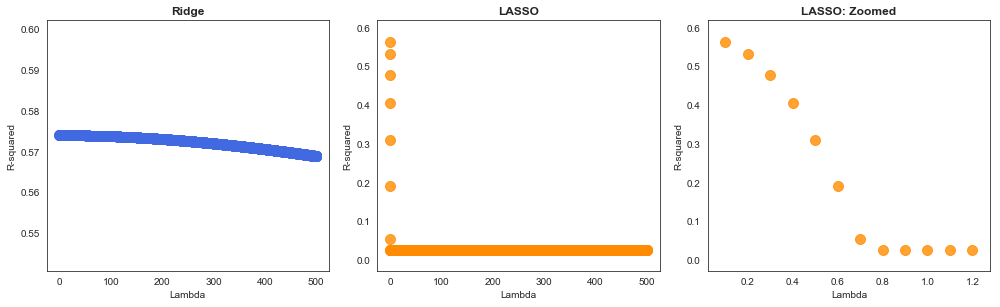

In [40]:
plt.figure(figsize=(14,8))

ax1 = plt.subplot(231)
sns.regplot(x='lambda', y='ridge_rsq', data=r_square, fit_reg=False, color='royalblue',
            scatter_kws={"s":100})
ax1.set_title('Ridge', fontweight='bold')
ax1.set_ylabel('R-squared')
ax1.set_xlabel('Lambda')

ax2 = plt.subplot(232)
sns.regplot(x='lambda', y='lasso_rsq', data=r_square, fit_reg=False, color='darkorange',
            scatter_kws={"s":100})
ax2.set_title('LASSO', fontweight='bold')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Lambda')

ax2 = plt.subplot(233)
sns.regplot(x='lambda', y='lasso_rsq', data=r_square[:12], fit_reg=False, color='darkorange',
            scatter_kws={"s":100})
ax2.set_title('LASSO: Zoomed', fontweight='bold')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Lambda')

plt.tight_layout()
plt.show()